# Titanic Ship Manifest Data Analysis

Run this cell below if you'd like to, but it's not required at all. 

In [ ]:
# Changing logging_enable = True gives consent to anonymously log. No personal data is collected, 
# just what code is run while working. We like to see how far people get in this lesson to help us design better ones.
from Logger import OnlineLogger
logging_enable = False
notebook = "titanic_data_analysis_walkthrough.ipynb"
course = "2021-10-21-Titanic-PythonDataAnalysis-In-Person"
if logging_enable == True:
    OnlineLogger.start(notebook,course)

-----------

# We've Got to Do Some Install(s)
Because it's good to know how to do that sort of thing

In [59]:
#This is a bash command to update/use plotnine for later. Let's practice!

#conda install -c conda-forge plotnine

In [45]:
import math
#import matplotlib as mpl              ### May need to uncomment these two lines for mac osx users
#mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotnine as p9
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Here is where I define all the variables that I may want to change later on


## Lets load in the dataset

In [5]:
#You'll have to find your own path! You're looking for /data/train.csv

df = pd.read_csv("data/train.csv")
df.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Lets see the types that were imported on our behalf

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


See the shape of the dataset

In [10]:
df.shape

(891, 12)

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [11]:
len(df)

891

In [12]:
len(df.columns)

12

In [ ]:
# Try to bring in the full data set using the read csv function! You can find data in the /data/ folder






In [13]:
# where df.columns is 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
my_famous_passenger = df[df["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)


     PassengerId  Survived  Pclass                      Name   Sex   Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male  46.0   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [16]:
###Lets get some information about a column

### Like mean age on the boat
print(df["Age"].mean())

### Fare
#df["Fare"].mean()
print(df["Fare"].describe())

29.69911764705882
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [17]:
### Fare
df["Fare"].mean()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
my_rich_passenger = df[df["Fare"] == 0.000]
print(my_rich_passenger)

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

In [19]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
titanic_cols = list(df.columns.values)
#cols = list(df.columns.values)
#print(cols)
print(titanic_cols)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [20]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
new_df = df[cols]
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S,5


In [21]:
#### We can create new dataframes from a few attributes
new_df = df[["Sex","Age"]]
new_df.head(10)


,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [22]:
df_of_women = df[df["Sex"] == "female"]
df_of_men = df[df["Sex"] == "male"]

In [23]:
df_of_women_noNA = df_of_women.dropna()

df_of_women_noNA.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,461.818182,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900
std,247.666236,0.253502,0.534959,14.240552,0.693962,0.756718,67.392455
min,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,10.462500
25%,288.000000,1.000000,1.000000,22.750000,0.000000,0.000000,39.550000
50%,455.000000,1.000000,1.000000,32.250000,0.000000,0.000000,77.958300
75%,692.750000,1.000000,1.000000,41.500000,1.000000,1.000000,114.956250
max,888.000000,1.000000,3.000000,63.000000,3.000000,2.000000,263.000000


In [24]:
df_of_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [25]:
# Excercise 
# Create three data frames. Capture them by passenger class 'PClass'. 
# There are three of them. Then figure out the size of each one.

df_pclass1 = df[(df['Pclass']==1) np.logical_or (df['Pclass']==2)]
df_pclass1.head()


SyntaxError: invalid syntax (<ipython-input-25-3732750f53d5>, line 5)

In [26]:
df_pclass_1 = df[df["Pclass"] == 1]
df_pclass_1.head()
df_pclass_1.shape

(216, 12)

In [27]:
df_pclass_2 = df[df["Pclass"] == 2]
df_pclass_2.head()
df_pclass_2.shape

(184, 12)

In [28]:
df_pclass_3 = df[df["Pclass"] == 3]
df_pclass_3.head()
df_pclass_3.shape

(491, 12)

Observations: There were many people in third class. More so than the other two class of passengers combined.

We can create new attributes from other attributes!

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize

<AxesSubplot:>

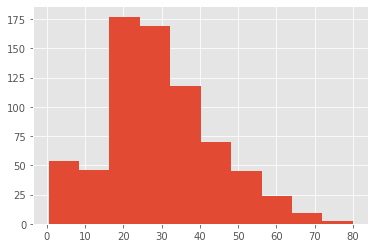

In [30]:
df["Age"].hist()

<AxesSubplot:>

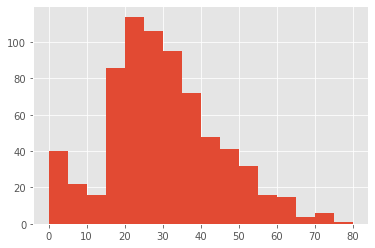

In [31]:
df["Age"].dropna().hist(bins=16, range=(0,80))

<AxesSubplot:>

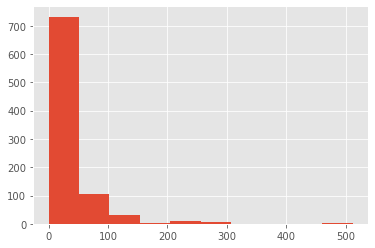

In [32]:
df["Fare"].hist()

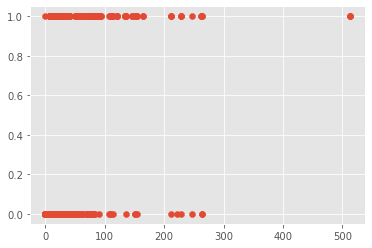

In [33]:
plt.scatter(df['Fare'], df['Survived'])
plt.show()

In [34]:
##### Back to the titanic. So we have our original dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
#### Lets group them by gender
grouped_by_sex = df.groupby(["Sex"])
grouped_by_sex.describe()

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ...   Fare           FamilySize            \
          count      mean  ...    75%       max      count      mean   
Sex                        ...                                         
female    314.0  0.742038  ...  55.00  512.3292      314.0  1.343949   
male      577.0  0.188908  ...  26.55  512.3292      577.0  0.665511   

                                            
             std  min  25%  50%  75%   max  
Sex                                         
female  1.755733  0.0  0.0  1.0  2.0  10.0  
male    1.478106  0.0  0.0  0.0  1.0  10.0  

[2 rows x 64 columns]

In [36]:
#### Lets group them by gender
df_grouped_by_sex_and_pclass = df.groupby(["Sex", "Pclass"])
df_grouped_by_sex_and_pclass.describe()

PassengerId                                               \
                    count        mean         std   min     25%    50%   
Sex    Pclass                                                            
female 1             94.0  469.212766  247.476723   2.0  293.50  447.0   
       2             76.0  443.105263  243.627288  10.0  269.75  439.5   
       3            144.0  399.729167  267.232416   3.0  165.25  376.0   
male   1            122.0  455.729508  247.026449   7.0  255.50  480.5   
       2            108.0  447.962963  256.922546  18.0  225.75  416.5   
       3            347.0  455.515850  261.921251   1.0  209.50  466.0   

                             Survived            ...        Fare            \
                  75%    max    count      mean  ...         75%       max   
Sex    Pclass                                    ...                         
female 1       698.25  888.0     94.0  0.968085  ...  134.500000  512.3292   
       2       616.75  881.0     76.0  0.921053  ...   26.062500   65.0000   
       3       636.00  889.0    144.0  0.500000  ...   20.221875   69.5500   
male   1       660.75  890.0    122.0  0.368852  ...   78.459375  512.3292   
       2       677.50  887.0    108.0  0.157407  ...   26.000000   73.5000   
       3       687.50  891.0    347.0  0.135447  ...   10.008300   69.5500   

              FamilySize                                                
                   count      mean       std  min  25%  50%  75%   max  
Sex    Pclass                                                           
female 1            94.0  1.010638  1.102243  0.0  0.0  1.0  1.0   5.0  
       2            76.0  1.092105  1.190828  0.0  0.0  1.0  2.0   5.0  
       3           144.0  1.694444  2.232242  0.0  0.0  1.0  2.0  10.0  
male   1           122.0  0.590164  0.951329  0.0  0.0  0.0  1.0   5.0  
       2           108.0  0.564815  0.888905  0.0  0.0  0.0  1.0   3.0  
       3           347.0  0.723343  1.751499  0.0  0.0  0.0  0.0  10.0  

[6 rows x 56 columns]

In [37]:
#### Lets group them by gender
df_grouped_by_sex_and_pclass_survived = df.groupby(["Sex", "Pclass", "Survived"])
df_grouped_by_sex_and_pclass_survived.describe()
#df_grouped_by_sex_and_pclass_survived.head()

PassengerId                                         \
                             count        mean         std    min     25%   
Sex    Pclass Survived                                                      
female 1      0                3.0  325.000000  162.194328  178.0  238.00   
              1               91.0  473.967033  248.968916    2.0  296.00   
       2      0                6.0  423.500000  322.594947   42.0  228.25   
              1               70.0  444.785714  238.617023   10.0  280.75   
       3      0               72.0  440.375000  263.865813   15.0  224.00   
              1               72.0  359.083333  266.188419    3.0  138.75   
male   1      0               77.0  413.623377  255.663741    7.0  171.00   
              1               45.0  527.777778  215.633410   24.0  431.00   
       2      0               91.0  454.010989  255.021371   21.0  231.00   
              1               17.0  415.588235  272.558035   18.0  194.00   
       3      0              300.0  456.750000  263.247078    1.0  206.25   
              1               47.0  447.638298  255.919776   37.0  241.50   

                                                Age             ...  \
                          50%     75%    max  count       mean  ...   
Sex    Pclass Survived                                          ...   
female 1      0         298.0  398.50  499.0    3.0  25.666667  ...   
              1         458.0  705.00  888.0   82.0  34.939024  ...   
       2      0         335.5  669.25  855.0    6.0  36.000000  ...   
              1         442.5  614.25  881.0   68.0  28.080882  ...   
       3      0         430.5  646.00  889.0   55.0  23.818182  ...   
              1         322.5  563.50  876.0   47.0  19.329787  ...   
male   1      0         439.0  626.00  873.0   61.0  44.581967  ...   
              1         588.0  682.00  890.0   40.0  36.248000  ...   
       2      0         419.0  685.50  887.0   84.0  33.369048  ...   
              1         408.0  571.00  832.0   15.0  16.022000  ...   
       3      0         471.5  687.25  891.0  215.0  27.255814  ...   
              1         430.0  679.00  870.0   38.0  22.274211  ...   

                              Fare           FamilySize                      \
                               75%       max      count      mean       std   
Sex    Pclass Survived                                                        
female 1      0         151.550000  151.5500        3.0  2.000000  1.732051   
              1         134.075000  512.3292       91.0  0.978022  1.074741   
       2      0          24.750000   26.0000        6.0  0.666667  0.816497   
              1          26.250000   65.0000       70.0  1.128571  1.214901   
       3      0          26.075025   69.5500       72.0  2.388889  2.651365   
              1          15.912500   31.3875       72.0  1.000000  1.424138   
male   1      0          77.287500  263.0000       77.0  0.532468  0.967694   
              1          79.200000  512.3292       45.0  0.688889  0.924962   
       2      0          26.000000   73.5000       91.0  0.450549  0.806415   
              1          26.000000   39.0000       17.0  1.176471  1.074436   
       3      0           9.500000   69.5500      300.0  0.736667  1.827143   
              1          15.820850   56.4958       47.0  0.638298  1.168900   

                                                  
                        min  25%  50%  75%   max  
Sex    Pclass Survived                            
female 1      0         0.0  1.5  3.0  3.0   3.0  
              1         0.0  0.0  1.0  1.0   5.0  
       2      0         0.0  0.0  0.5  1.0   2.0  
              1         0.0  0.0  1.0  2.0   5.0  
       3      0         0.0  0.0  1.0  4.0  10.0  
              1         0.0  0.0  0.0  2.0   6.0  
male   1      0         0.0  0.0  0.0  1.0   5.0  
              1         0.0  0.0  0.0  1.0   3.0  
       2      0         0.0  0.0  0.0  1.0   3.0  
   

In [38]:
df_sex_passclass_survival = df.groupby(['Sex', 'Pclass',"Survived"]).count() 
df ### Count of records in each group throughout a dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


---------------------------------

# A Quick Tangent, Or, "Why I'm not a big fan of matplotlib"


In [39]:
# Lets create a scatter plot

d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10)}
print(d)

{'one': array([0.88799979, 0.63603667, 0.50918521, 0.63506817, 0.89968082,
       0.30331434, 0.49188477, 0.90768155, 0.5818639 , 0.28188753]), 'two': array([0.38918956, 0.60425335, 0.77388469, 0.37022362, 0.61492235,
       0.34962308, 0.6769127 , 0.65000222, 0.67286976, 0.31869687])}


<AxesSubplot:>

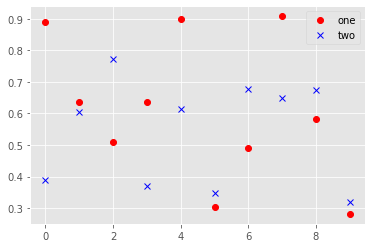

In [40]:
# And call it something so we can plot it
df_crap = pd.DataFrame(d)
df_crap.plot(style=['ro','bx'])

Needless to say, this isn't publication quality. And honestly, it'll most likely never be. 

## Actual code for a multisubplot figure in matplotlib that I wrote as my first program:

%matplotlib inline
### define figure size, column layout, grid layout
figsize = (15, (len(query_api_chrs_final))+30)
cols = 2
gs = gridspec.GridSpec(len(output_dict) // cols + 1, cols)


### These are the "Tableau 20" colors as RGB  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

### Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts  
#### Yeah I'm actually iterating over the colors to color things in the plot here because as a beginner I couldn't figure out a better way first :|

```
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
```

### Then I figured out if I added a dependency that can't really be moved around anywhere I could make the code slightly easier
`current_palette = sns.color_palette("husl", 40)`

#("Set2", 30)
#tableau20   

### Now the actual figure
fig = plt.figure(figsize=figsize, frameon=False)
subplt_count = -1
ax = []

### Yup, looping again to get the number of subplots, their size, and where to put them in the final figure

```
for tchr in listofchrgraph:
    subplt_count += 1
    print "Plotting subplot: "+str(subplt_count)
    count = 0 
    row = (subplt_count // cols)
    col = subplt_count % cols
    ax.append(fig.add_subplot(gs[row, col]))   
    for qchr in output_dict[tchr]:
        count += 1
        try:
            if (max(output_dict[tchr][qchr].itervalues()))>5:
                x = output_dict[tchr][qchr].keys()
                y = output_dict[tchr][qchr].values()
                #Sets up plotting conditions
                ax[-1].spines["top"].set_visible(False)
                ax[-1].spines["right"].set_visible(False)
                ax[-1].spines["left"].set_visible(True)
                ax[-1].spines["bottom"].set_visible(True)
                ax[-1].patch.set_visible(False)
                ax[-1].get_xaxis().tick_bottom()
                ax[-1].get_yaxis().tick_left()
                ax[-1].plot(x, y, color=current_palette[count], lw=2, label=str(qchr))
                ax[-1].set_title(label='Target Chromosome: '+species_name_filter+" "+ tchr, fontweight='bold', fontsize=14, y=1.1, loc='left')
                ax[-1].set_xlabel('Window Iteration\n(Gene number)', fontsize=12, fontweight='bold')
                ax[-1].set_ylabel('% Retention\n(#Syntenic genes/window size)', fontsize=12, fontweight='bold')
                ax[-1].legend(bbox_to_anchor=(1.25, 1.13), loc=1, frameon=False, title="       Query\nChromosome", fontsize=10)
            else:
                continue    
        except ValueError:
            continue
```

### This is code I tried because Stack Overflow said it'd help; it didn't, but I didn't have the heart to actually delete it because I wasn't sure if it'd be useful again some day. It wasn't. 
#fig.tight_layout(pad=2, w_pad = 6)

### Taking all that above and actually calling the plot
```fig.subplots_adjust(wspace=0.45, hspace=0.6)
plt.savefig("~/Desktop/SynMapFractBiasAnalysis/fractbias_figure"+str(species_name_filter)+".png", transparent=False)```

## But I got something like this
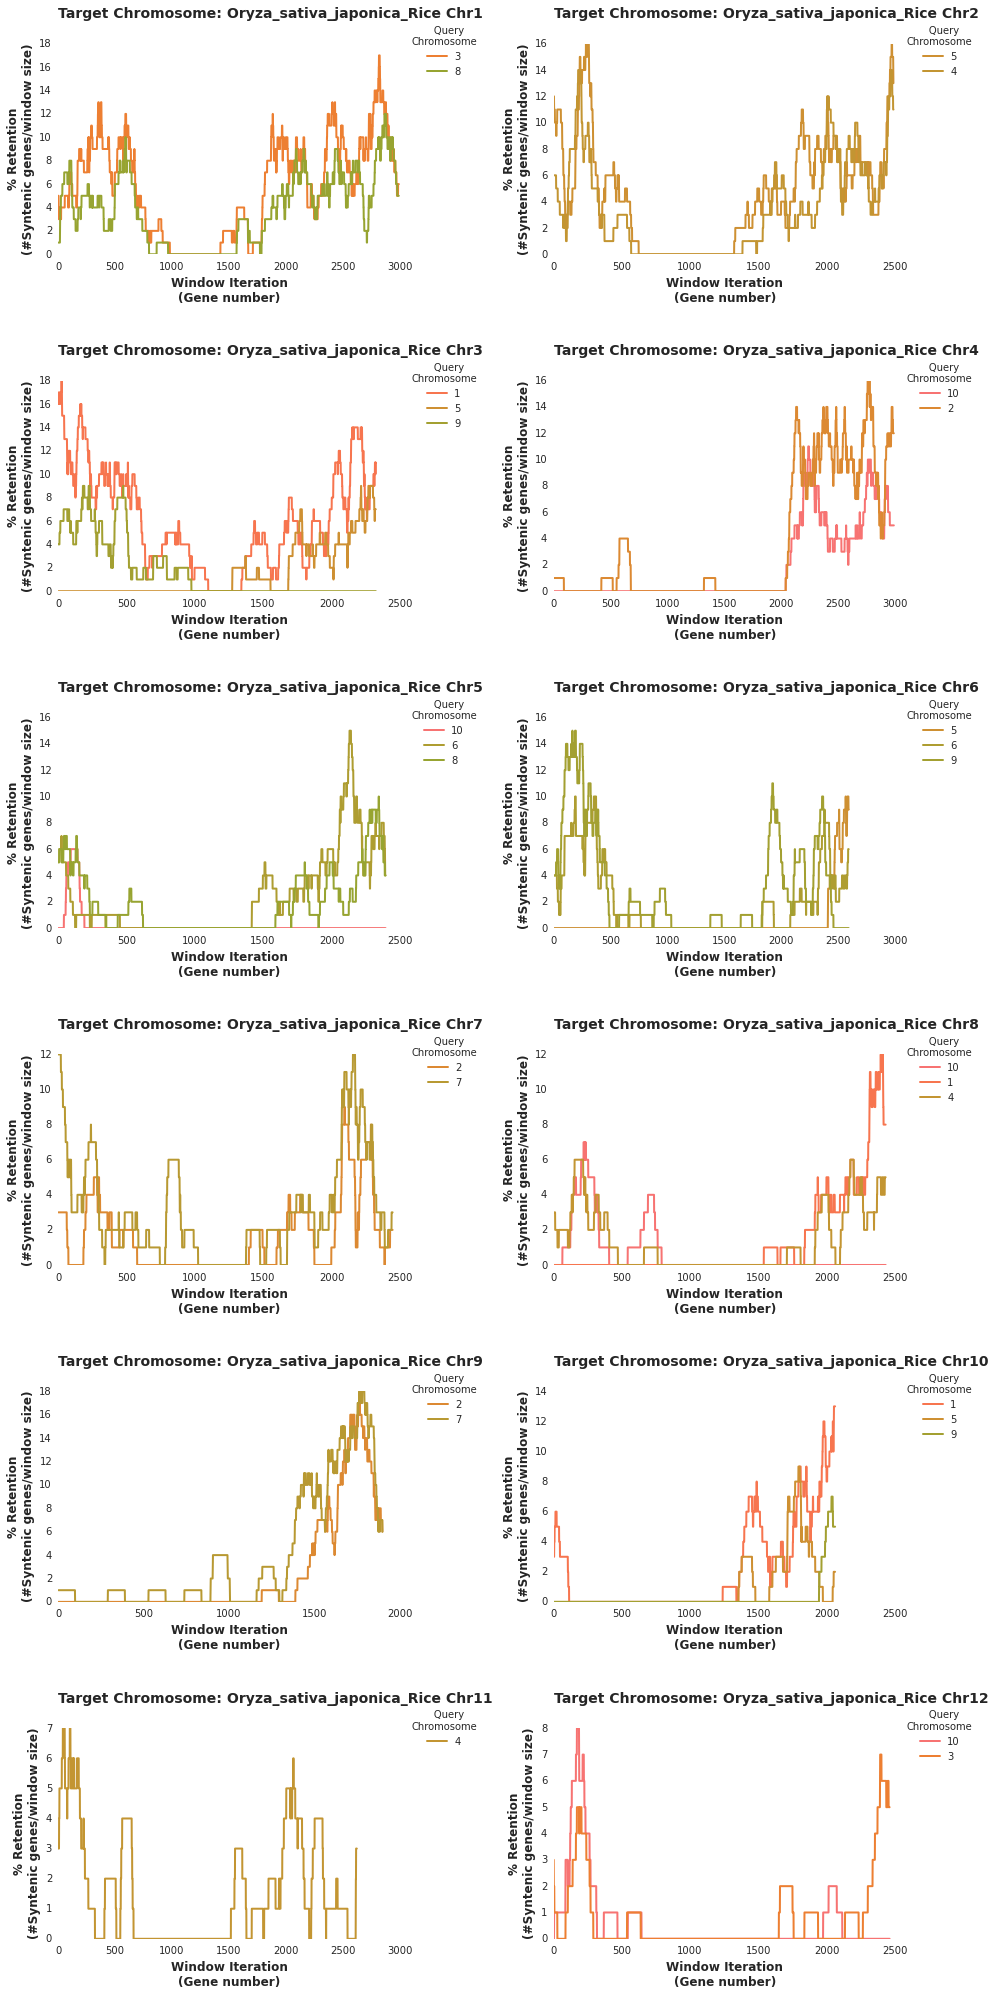

## This code was changed to six lines of Plotly code. Thank you D3 and Plotly.

-------------------------------------------------

# Plotting considerations
1. List out the head or columns of dataframes of interest.
1. Be sure you're getting correct dataframe while graphing.

In [41]:
# Example 1
df_sex_passclass_survival.head()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass Survived                                                       
female 1      0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       2      0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       3      0                  72    72   55     72     72      72    72   

                        Cabin  Embarked  FamilySize  
Sex    Pclass Survived                               
female 1      0             3         3           3  
              1            78        89          91  
       2      0             1         6           6  
              1             9        70          70  
       3      0             2        72          72

# Plotting with plotnine
Which is totally ** cough ** ggplot from R ** cough ** but in Python. And that's great. It even uses the same grammar as ggplot. So we can leverage all the knowledge from ggplot examples for everything we're going to do. 


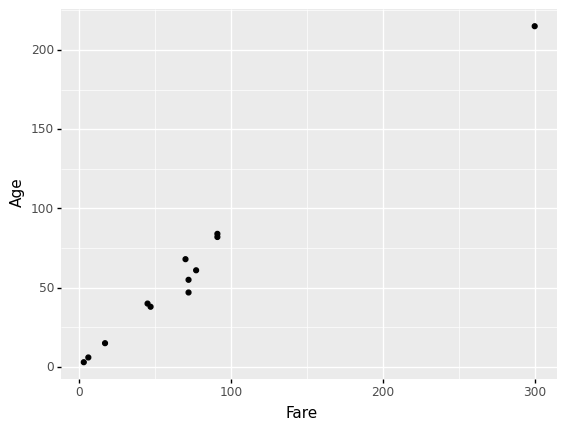

<ggplot: (8795279554838)>

In [46]:
# Create the parts of the plot
titanic_plot = p9.ggplot(data=df_sex_passclass_survival,
                         mapping=p9.aes(x='Fare', y='Age'))

# Draw the plot
titanic_plot + p9.geom_point()


**Hypothesis 1:** There was a vampire on board the Titanic. Not only did this vampire report their actual age, but they also paid the standard "Passenger Endangerment and Loss of Blood" Ticket Surcharge. This is why that ticket was $300.

**Hypothesis 0 =** Something is wrong.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


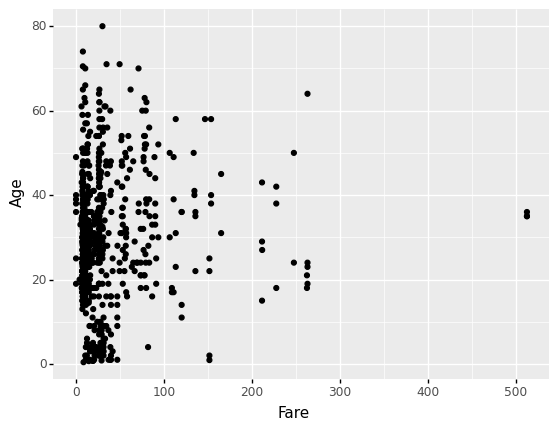

<ggplot: (8795339469060)>

In [47]:
# Let's try the same thing, but with the original dataframe
titanic_plot = p9.ggplot(data=df,
                         mapping=p9.aes(x='Fare', y='Age'))

# Draw the plot
titanic_plot + p9.geom_point()

Distributions are fun to plot

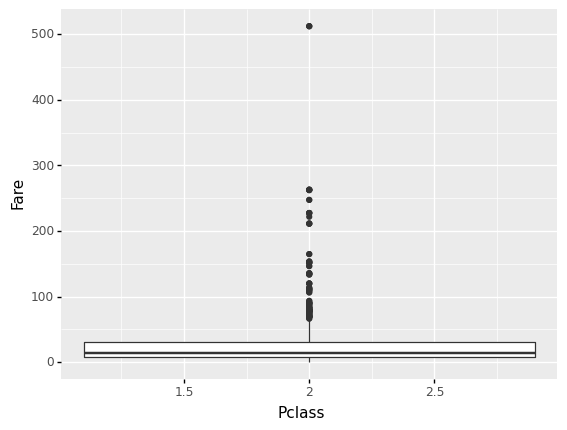

<ggplot: (8795279716063)>

In [48]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='Pclass',
                          y='Fare'))
    + p9.geom_boxplot()
)


### That's nice, but it's not super useful to put all the classes together 
Let's split them out into the factors of Pclass...using the aptly named factor function

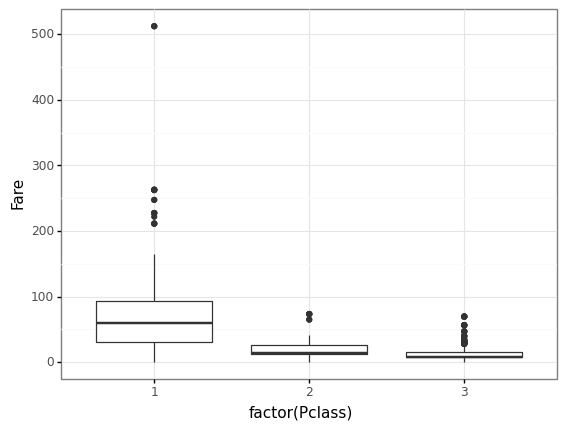

<ggplot: (8795279709483)>

In [49]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='factor(Pclass)',
                          y='Fare'))
    + p9.geom_boxplot()
    + p9.theme_bw()
)

# Let's Get Fancy: we're all fancy people

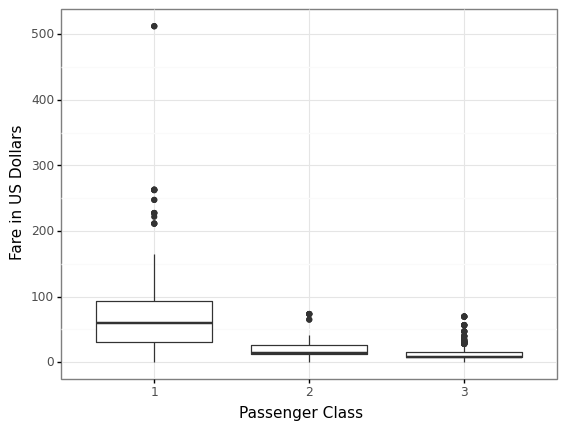

<ggplot: (8795288849914)>

In [50]:
(p9.ggplot(data=df,
           mapping=p9.aes(x='factor(Pclass)',y='Fare'))
 + p9.geom_boxplot()
    + p9.theme_bw()
    + p9.labs(x = 'Passenger Class', y ='Fare in US Dollars')
)

# It's time to break out! 
## Let's create some interesting visualizations and report back
Most interesting visualization wins!

In [52]:
# Logistic Regression Time!

import statsmodels.api as sm
import pylab as pl


In [53]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


In [54]:
# Create a new temp data frame
new_df = df

def gender_to_numeric(x):
    if x == "male":
        return 0
    else:
        return 1

In [55]:
new_df['Sex'] = new_df['Sex'].apply(gender_to_numeric)

In [56]:
new_df = new_df[["Survived", "Age","Sex", "Pclass"]]
new_df = new_df.dropna()

train_cols = new_df.columns[1:]
train_cols
logit = sm.Logit(new_df['Survived'], new_df[train_cols])

#Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.476553
         Iterations 6


In [57]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.2944
Time:                        17:40:59   Log-Likelihood:                -340.26
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.141e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0035      0.004     -0.777      0.437      -0.012       0.005
Sex            2.6431      0.193     13.710      0.000       2.265       3.021
Pclass        -0.6535      0.072     -9.108      0.0

In [58]:
print(result.conf_int())

               0         1
Age    -0.012195  0.005269
Sex     2.265226  3.020908
Pclass -0.794116 -0.512863
